# **1. Chargement et téléchargement des libraries**

Installation du package TCGAbiolinks : à faire une fois

In [40]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install(c(
  "TCGAbiolinks",
  "SummarizedExperiment"
))

install.packages(c("dplyr", "ggplot2", "pheatmap"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.21 (BiocManager 1.30.27), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'TCGAbiolinks' 'SummarizedExperiment'”
Old packages: 'BH', 'circlize', 'data.table', 'futile.logger', 'future.apply',
  'ggtangle', 'httr2', 'isoband', 'knitr', 'leidenbase', 'parallelly',
  'RcppArmadillo', 'reformulas', 'Seurat', 'SeuratObject', 'shiny', 'tidyr',
  'TMB', 'xfun', 'yaml', 'yulab.utils', 'zoo'




The downloaded binary packages are in
	/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T//RtmpEvvtrk/downloaded_packages


chargement des libraries

In [41]:
library(TCGAbiolinks)
library(SummarizedExperiment)
library(dplyr)
library(ggplot2)
library(pheatmap)

set.seed(555)

# **2. Chargement du dataset TCGA thyroide**

### _**téléchargement des données TCGA**_
- projet THCA : cancer de la thyroide 
- seulement les données de quantification d'expression génique et de transcriptome profiling 

In [42]:
# prends .. minutes
query <- GDCquery(
  project = "TCGA-THCA",
  data.category = "Transcriptome Profiling",
  data.type = "Gene Expression Quantification",
  workflow.type = "STAR - Counts"
)

# GDCdownload(query, directory = "../data")
se <- GDCprepare(query,directory = "../data")

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-THCA

--------------------

oo Filtering results

--------------------

ooo By data.type

ooo By workflow.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



|====================================================|100%                      Completed after 26 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

thca subtype information from:doi:10.1016/j.cell.2014.09.050

Available assays in SummarizedExperiment : 
  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand



In [43]:
se

class: RangedSummarizedExperiment 
dim: 60660 572 
metadata(1): data_release
assays(6): unstranded stranded_first ... fpkm_unstrand fpkm_uq_unstrand
rownames(60660): ENSG00000000003.15 ENSG00000000005.6 ...
  ENSG00000288674.1 ENSG00000288675.1
rowData names(10): source type ... hgnc_id havana_gene
colnames(572): TCGA-DJ-A2Q6-01A-11R-A18C-07
  TCGA-FK-A3SE-01A-11R-A22L-07 ... TCGA-DJ-A2PX-01A-11R-A18C-07
  TCGA-EL-A3ZS-01A-12R-A23N-07
colData names(241): barcode patient ... paper_TERT_AC paper_TERT_Q

### _**load des données cliniques**_

In [44]:
clinique <- GDCquery_clinic(
  project = "TCGA-THCA",
  type = "clinical")

head(clinique)
names(clinique)

#lister tous les éléments de ajcc_pathologic_stage
table(clinique$ajcc_pathologic_stage)

,project,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,laterality,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,age_at_diagnosis,⋯,treatments_radiation_treatment_anatomic_sites,treatments_radiation_treatment_outcome,treatments_radiation_treatment_dose_units,treatments_radiation_number_of_fractions,treatments_radiation_radiosensitizing_agent,treatments_radiation_course_number,treatments_radiation_clinical_trial_indicator,treatments_radiation_route_of_administration,treatments_radiation_initial_disease_status,bcr_patient_barcode
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TCGA-THCA,TCGA-EM-A2OZ,No,Stage I,0,Midline,NA,NA,Thyroid gland,24195,⋯,NULL,NA,NA,NA,NA,NA,NA,NULL,NA,TCGA-EM-A2OZ
2,TCGA-THCA,TCGA-EM-A22J,No,Stage II,0,Left,NA,NA,Thyroid gland,20539,⋯,NULL;Primary Tumor Field,NA;Complete Response,NA;mCi,NA,NA,NA,NA,NULL,NA,TCGA-EM-A22J
3,TCGA-THCA,TCGA-DJ-A2PR,No,Stage I,0,Bilateral,NA,NA,Thyroid gland,9914,⋯,NULL,NA,NA,NA,NA,NA,NA,NULL,NA,TCGA-DJ-A2PR
4,TCGA-THCA,TCGA-ET-A40S,No,Stage II,0,Left,NA,NA,Thyroid gland,22733,⋯,NULL,Not Reported;NA,NA,NA,NA,NA,NA,NULL,NA,TCGA-ET-A40S
5,TCGA-THCA,TCGA-ET-A39M,No,Stage I,0,Left,NA,NA,Thyroid gland,12441,⋯,NULL;Primary Tumor Field,NA;Complete Response,NA,NA;1,NA,NA,NA,NULL,NA,TCGA-ET-A39M
6,TCGA-THCA,TCGA-ET-A40Q,No,Stage I,0,Right,NA,NA,Thyroid gland,14136,⋯,NULL;Primary Tumor Field,NA;Unknown,NA;mCi,NA;1,NA,NA,NA,NULL,NA,TCGA-ET-A40Q


[1] "project"                                           
 [2] "submitter_id"                                      
 [3] "synchronous_malignancy"                            
 [4] "ajcc_pathologic_stage"                             
 [5] "days_to_diagnosis"                                 
 [6] "laterality"                                        
 [7] "created_datetime"                                  
 [8] "last_known_disease_status"                         
 [9] "tissue_or_organ_of_origin"                         
[10] "age_at_diagnosis"                                  
[11] "primary_diagnosis"                                 
[12] "updated_datetime"                                  
[13] "prior_malignancy"                                  
[14] "year_of_diagnosis"                                 
[15] "state"                                             
[16] "prior_treatment"                                   
[17] "diagnosis_is_primary_disease"                      
[18] "days_to_last_known_disease_status"                 
[19] "ajcc_staging_system_edition"                       
[20] "ajcc_pathologic_t"                                 
[21] "days_to_recurrence"                                
[22] "morphology"                                        
[23] "ajcc_pathologic_n"                                 
[24] "ajcc_pathologic_m"                                 
[25] "residual_disease"                                  
[26] "classification_of_tumor"                           
[27] "tumor_focality"                                    
[28] "diagnosis_id"                                      
[29] "icd_10_code"                                       
[30] "site_of_resection_or_biopsy"                       
[31] "tumor_grade"                                       
[32] "progression_or_recurrence"                         
[33] "tumor_of_origin"                                   
[34] "cigarettes_per_day"                                
[35] "alcohol_history"                                   
[36] "exposure_id"                                       
[37] "exposure_type"                                     
[38] "alcohol_intensity"                                 
[39] "race"                                              
[40] "gender"                                            
[41] "ethnicity"                                         
[42] "vital_status"                                      
[43] "age_at_index"                                      
[44] "days_to_birth"                                     
[45] "year_of_birth"                                     
[46] "demographic_id"                                    
[47] "age_is_obfuscated"                                 
[48] "year_of_death"                                     
[49] "country_of_residence_at_enrollment"                
[50] "days_to_death"                                     
[51] "days_to_last_follow_up"                            
[52] "follow_ups_disease_response"                       
[53] "treatments_pharmaceutical_treatment_intent_type"   
[54] "treatments_pharmaceutical_treatment_id"            
[55] "treatments_pharmaceutical_treatment_type"          
[56] "treatments_pharmaceutical_treatment_or_therapy"    
[57] "treatments_pharmaceutical_therapeutic_agents"      
[58] "treatments_pharmaceutical_timepoint_category"      
[59] "treatments_pharmaceutical_prescribed_dose_units"   
[60] "treatments_pharmaceutical_pretreatment"            
[61] "treatments_pharmaceutical_prescribed_dose"         
[62] "treatments_pharmaceutical_days_to_treatment_end"   
[63] "treatments_pharmaceutical_treatment_dose"          
[64] "treatments_pharmaceutical_days_to_treatment_start" 
[65] "treatments_pharmaceutical_treatment_anatomic_sites"
[66] "treatments_pharmaceutical_treatment_outcome"       
[67] "treatments_pharmaceutical_treatment_dose_units"    
[68] "treatments_pharmaceutical_number_of_fractions"     
[69] "treatments_pharmaceutical_radiosensitizing_agent"  


  Stage I  Stage II Stage III  Stage IV Stage IVA Stage IVC 
      285        52       113         2        47         6 

# **3. Exploration du dataset**

In [45]:
# Dimensions
se
dim(se)

class: RangedSummarizedExperiment 
dim: 60660 572 
metadata(1): data_release
assays(6): unstranded stranded_first ... fpkm_unstrand fpkm_uq_unstrand
rownames(60660): ENSG00000000003.15 ENSG00000000005.6 ...
  ENSG00000288674.1 ENSG00000288675.1
rowData names(10): source type ... hgnc_id havana_gene
colnames(572): TCGA-DJ-A2Q6-01A-11R-A18C-07
  TCGA-FK-A3SE-01A-11R-A22L-07 ... TCGA-DJ-A2PX-01A-11R-A18C-07
  TCGA-EL-A3ZS-01A-12R-A23N-07
colData names(241): barcode patient ... paper_TERT_AC paper_TERT_Q

[1] 60660   572

In [46]:
# Métadonnées
meta <- as.data.frame(colData(se))
head(meta)

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,tumor_descriptor,sample_id,pathology_report_uuid,submitter_id,⋯,paper_mutDriver_DCCF_CI95H,paper_mutDriver_CCF_gene,paper_EXCLUDE_SAMPLE,paper_patient,paper_TERT_DEPTH,paper_TERT_POWER,paper_TERT,paper_TERT_AF,paper_TERT_AC,paper_TERT_Q
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<fct>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>
TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-DJ-A2Q6,TCGA-DJ-A2Q6-01A,TP,Primary solid Tumor,TCGA-DJ-A2Q6-01A,Primary,74b9c0c8-ef36-4194-ab8c-d81d61a39705,CCF825BD-7410-4ED2-B0E2-8B17BB5C5BBD,TCGA-DJ-A2Q6,⋯,"1,000",BRAF:1.000,0,TCGA-DJ-A2Q6,81005,1,,,NA,
TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-FK-A3SE,TCGA-FK-A3SE-01A,TP,Primary solid Tumor,TCGA-FK-A3SE-01A,Primary,d3cc158d-413d-49e6-8d23-3ed89fdea94a,3489196F-F9FD-4797-B4F2-0D66D420102A,TCGA-FK-A3SE,⋯,,,0,TCGA-FK-A3SE,44535,1,,,NA,
TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-DJ-A2QA,TCGA-DJ-A2QA-01A,TP,Primary solid Tumor,TCGA-DJ-A2QA-01A,Primary,2277f3f2-411e-47ab-a2b9-f80fd33540a1,E3CC8058-B202-4433-8597-6BD196D04AAC,TCGA-DJ-A2QA,⋯,"1,000",BRAF:1.000,0,TCGA-DJ-A2QA,75617,1,,,NA,
TCGA-FY-A2QD-01A-11R-A19O-07,TCGA-FY-A2QD-01A-11R-A19O-07,TCGA-FY-A2QD,TCGA-FY-A2QD-01A,TP,Primary solid Tumor,TCGA-FY-A2QD-01A,Primary,08d3cb3b-9a80-4034-b06d-b37dd38c8b9b,D4447081-2054-46B6-B83F-C0D2DF8C4AA1,TCGA-FY-A2QD,⋯,,,0,TCGA-FY-A2QD,23085,1,,,NA,
TCGA-EL-A3GR-01A-21R-A206-07,TCGA-EL-A3GR-01A-21R-A206-07,TCGA-EL-A3GR,TCGA-EL-A3GR-01A,TP,Primary solid Tumor,TCGA-EL-A3GR-01A,Primary,12693f53-fa09-494c-82eb-bf735ea84e98,F2945CC2-AEE4-45F7-A640-4174EB0D37FD,TCGA-EL-A3GR,⋯,"1,000",BRAF:0.910,0,TCGA-EL-A3GR,37268,1,,,NA,
TCGA-EL-A3T7-01A-11R-A22L-07,TCGA-EL-A3T7-01A-11R-A22L-07,TCGA-EL-A3T7,TCGA-EL-A3T7-01A,TP,Primary solid Tumor,TCGA-EL-A3T7-01A,Primary,76e3d9f4-513f-4a44-8918-4c29ce5fb305,6B1080F8-AF82-4FE3-B91D-3CA2DBA4A37E,TCGA-EL-A3T7,⋯,"0,982",BRAF:0.850,0,TCGA-EL-A3T7,46146,1,,,NA,


In [47]:
# Types d’échantillons
table(meta$sample_type)
table(meta$shortLetterCode)


         Metastatic       Primary Tumor Solid Tissue Normal 
                  8                 505                  59 


 NT  TM  TP 
 59   8 505 

# **4. Création de la matrice d'expression**

## *Loading de la matrice d'expresison brute*

In [48]:
expr <- assay(se, "unstranded")   # counts
head(expr)
dim(expr)

,TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-FY-A2QD-01A-11R-A19O-07,TCGA-EL-A3GR-01A-21R-A206-07,TCGA-EL-A3T7-01A-11R-A22L-07,TCGA-EL-A3T7-11A-21R-A22L-07,TCGA-FE-A230-01A-11R-A14Y-07,TCGA-EM-A3FO-01A-11R-A21D-07,TCGA-DJ-A3VB-01A-11R-A23N-07,⋯,TCGA-EM-A2P1-01A-11R-A206-07,TCGA-EL-A3T1-01A-11R-A22L-07,TCGA-EL-A3T1-11A-11R-A22L-07,TCGA-DJ-A2PS-01A-11R-A18C-07,TCGA-EL-A3TB-11A-11R-A22L-07,TCGA-EL-A3TB-01A-11R-A22L-07,TCGA-BJ-A45C-01A-11R-A23W-07,TCGA-DJ-A3UX-01A-11R-A22L-07,TCGA-DJ-A2PX-01A-11R-A18C-07,TCGA-EL-A3ZS-01A-12R-A23N-07
ENSG00000000003.15,6156,7191,2219,5185,4466,9702,4546,2449,6336,5997,⋯,2691,4533,2931,4471,5029,4742,3753,4488,6131,4097
ENSG00000000005.6,7,3,1,0,3,0,10,0,0,2,⋯,0,0,5,0,4,3,4,5,6,4
ENSG00000000419.13,2540,3815,735,2594,1496,2506,1854,811,1892,3074,⋯,2227,2406,2209,1832,2753,2172,1491,2061,2439,2218
ENSG00000000457.14,1452,767,305,970,820,1036,1279,619,725,856,⋯,759,1120,607,922,1200,1171,962,1151,1213,829
ENSG00000000460.17,297,276,28,135,208,315,183,194,149,317,⋯,279,381,169,226,232,245,166,250,242,313
ENSG00000000938.13,1075,1069,303,71,610,1576,459,446,315,1829,⋯,1147,1127,1169,440,440,372,184,775,1076,1841


[1] 60660   572

_commentaire_ : la matrice d'expression de base a 572 échantillons : 
- **8** "Metastatic"
- **59** "Solid Tissue Normal"
- **505** "Primary Tumor"

Mais les __*Solid Tissue Normal*__ ne sont pas des contrôles sains, juste des échantillons de tissus normaux prélevés à côté de la tumeur, ils n'ont pas de stade tumoral. Il faut qu'on les enlève pour ne garder que les échantillons "Primary Tumor".

Pour les __*Metastasique*__, ce ne sont pas des tissus thyroidiens, et ont un profil d'expression reprogrammé et souvent issus de stades avancés. Du coup le modèle va apprendre seulement le site métastasique plutôt que la biologie du stade tumoral. En fait, on fait ici du data leakage parce que les métastases impliquent forcément un stade avancé.

Alors, on ne garde que les __*Primary Tumor*__ pour faire l'analyse et pouvoir prédire les stades tumoraux. C'est ce que fait la cellule de code suivante. On utilise *se_tumor* au lieu de simplement *se*, et *meta_tumor* au lieu de *meta*


In [49]:
se_tumor <- se[, meta$sample_type == "Primary Tumor" & meta$primary_diagnosis %in% grep("papillar", meta$primary_diagnosis, ignore.case = TRUE, value = TRUE)]
dim(se_tumor)

meta_tumor <- as.data.frame(colData(se_tumor)) # métadonnées des échantillons tumoraux
meta_tumor$patient_id <- substr(rownames(meta_tumor), 1, 12) # extraction des IDs patients

summary(table(meta_tumor$patient_id)) # permet de vérifier qu'il n'y a qu'un échantillon par patient, évite les doublons
# on peut maintenant dire que 1 colonne = 1 patient = 1 échantillon ssi "Number of factors = 1"

[1] 60660   475

Number of cases in table: 475 
Number of factors: 1 

## *Travailler sur un dataframe réduit, avec seulement les tumeurs primaires*

In [50]:
stopifnot(all(table(meta_tumor$patient_id) == 1)) # si il y a des doublons, le script s'arrête
stopifnot(all(meta_tumor$barcode %in% colnames(expr))) # vérifie que tous les échantillons tumoraux sont dans la matrice d'expression

se_patient <- se_tumor # simplifie les noms (pour pas s'y perdre)
metadata_patients <- meta_tumor

- se_patient : matrice d'expression avec seulement les échantillons "Primary Tumor"
- metadata_patient : metadata avec seulement les échantillons "Primary Tumor"

In [51]:
head(assay(se_patient))
dim(assay(se_patient))
head(metadata_patients, 3) # les 3 premiers

,TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-FY-A2QD-01A-11R-A19O-07,TCGA-EL-A3GR-01A-21R-A206-07,TCGA-EL-A3T7-01A-11R-A22L-07,TCGA-FE-A230-01A-11R-A14Y-07,TCGA-EM-A3FO-01A-11R-A21D-07,TCGA-DJ-A3VB-01A-11R-A23N-07,TCGA-BJ-A28X-01A-11R-A22L-07,⋯,TCGA-DJ-A13S-01A-11R-A10U-07,TCGA-EM-A3SY-01A-11R-A22U-07,TCGA-EM-A2P1-01A-11R-A206-07,TCGA-EL-A3T1-01A-11R-A22L-07,TCGA-DJ-A2PS-01A-11R-A18C-07,TCGA-EL-A3TB-01A-11R-A22L-07,TCGA-BJ-A45C-01A-11R-A23W-07,TCGA-DJ-A3UX-01A-11R-A22L-07,TCGA-DJ-A2PX-01A-11R-A18C-07,TCGA-EL-A3ZS-01A-12R-A23N-07
ENSG00000000003.15,6156,7191,2219,5185,4466,9702,2449,6336,5997,3534,⋯,2448,3693,2691,4533,4471,4742,3753,4488,6131,4097
ENSG00000000005.6,7,3,1,0,3,0,0,0,2,1,⋯,0,0,0,0,0,3,4,5,6,4
ENSG00000000419.13,2540,3815,735,2594,1496,2506,811,1892,3074,1769,⋯,1851,2286,2227,2406,1832,2172,1491,2061,2439,2218
ENSG00000000457.14,1452,767,305,970,820,1036,619,725,856,948,⋯,764,459,759,1120,922,1171,962,1151,1213,829
ENSG00000000460.17,297,276,28,135,208,315,194,149,317,332,⋯,176,185,279,381,226,245,166,250,242,313
ENSG00000000938.13,1075,1069,303,71,610,1576,446,315,1829,1886,⋯,635,332,1147,1127,440,372,184,775,1076,1841


[1] 60660   475

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,tumor_descriptor,sample_id,pathology_report_uuid,submitter_id,⋯,paper_mutDriver_CCF_gene,paper_EXCLUDE_SAMPLE,paper_patient,paper_TERT_DEPTH,paper_TERT_POWER,paper_TERT,paper_TERT_AF,paper_TERT_AC,paper_TERT_Q,patient_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<chr>
TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-DJ-A2Q6,TCGA-DJ-A2Q6-01A,TP,Primary solid Tumor,TCGA-DJ-A2Q6-01A,Primary,74b9c0c8-ef36-4194-ab8c-d81d61a39705,CCF825BD-7410-4ED2-B0E2-8B17BB5C5BBD,TCGA-DJ-A2Q6,⋯,BRAF:1.000,0,TCGA-DJ-A2Q6,81005,1,,,NA,,TCGA-DJ-A2Q6
TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-FK-A3SE,TCGA-FK-A3SE-01A,TP,Primary solid Tumor,TCGA-FK-A3SE-01A,Primary,d3cc158d-413d-49e6-8d23-3ed89fdea94a,3489196F-F9FD-4797-B4F2-0D66D420102A,TCGA-FK-A3SE,⋯,,0,TCGA-FK-A3SE,44535,1,,,NA,,TCGA-FK-A3SE
TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-DJ-A2QA,TCGA-DJ-A2QA-01A,TP,Primary solid Tumor,TCGA-DJ-A2QA-01A,Primary,2277f3f2-411e-47ab-a2b9-f80fd33540a1,E3CC8058-B202-4433-8597-6BD196D04AAC,TCGA-DJ-A2QA,⋯,BRAF:1.000,0,TCGA-DJ-A2QA,75617,1,,,NA,,TCGA-DJ-A2QA


## *Renommer les patients avec leurs métadata*

### _**Filtrer : age, sexe, stage, type de tumeur, et mutation simple**_

In [52]:
metadata_patients <- metadata_patients %>%
  mutate(
    # Age
    age_years = as.integer(age_at_index),

    # Sexe
    sex_short = case_when(
      tolower(gender) %in% c("male","m")   ~ "male",
      tolower(gender) %in% c("female","f") ~ "female",
      # TRUE ~ "UNKSEX"
      TRUE ~ NA_character_
    ),

    # Stage simplifié
    stage = as.character(ajcc_pathologic_stage),
    stage_simple = case_when(
      is.na(stage) ~  "Stage_NA",
      grepl("^Stage I\\b", stage)   ~ "Stade_I",
      grepl("^Stage II\\b", stage)  ~ "Stade_II",
      grepl("^Stage III\\b", stage) ~ "Stade_III",
      grepl("^Stage IV", stage)  ~ "Stade_IV",
      TRUE                                  ~ "Stage_NA"
    ),

    # Type cancer : PTC / FTC / OTHER
    diagnosis = as.character(primary_diagnosis),
    cancer_type = case_when(
      grepl("papillar",  tolower(diagnosis)) ~ "PTC",
      grepl("follicular",tolower(diagnosis)) ~ "FTC",
      TRUE ~ "OTHER"
    )
  )

### 3) Mutation + catégories

get_mutation_label <- function(df) {
  if ("paper_mutDriver_CCF_gene" %in% names(df)) {
    x <- as.character(df$paper_mutDriver_CCF_gene)   # ex "BRAF:1.000"
    mut <- sub(":.*$", "", x)
    mut <- ifelse(is.na(mut) | mut == "", "UNK", mut)
    return(mut)
  }
  rep("UNK", nrow(df))
}

metadata_patients$mutation <- get_mutation_label(metadata_patients)

metadata_patients <- metadata_patients %>%
  mutate(
    mutation_group = case_when(
      mutation == "BRAF" ~ "BRAF",
      mutation %in% c("NRAS","HRAS","KRAS") ~ "RAS",
      mutation == "EIF1AX" ~ "EIF1AX",
      mutation == "UNK" ~ "NO_CANONICAL_DRIVER",
      TRUE ~ "OTHER"
    )
  )

### _**Visualisation des metadatas des patients**_

In [53]:
# Visualisation de ce qui a été fait avant
head(metadata_patients)
# Nombre de stage, type de cancer, mutation et age
table(metadata_patients$stage_simple)
table(metadata_patients$cancer_type)
table(metadata_patients$mutation_group)
table(metadata_patients$age_years)

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,tumor_descriptor,sample_id,pathology_report_uuid,submitter_id,⋯,paper_TERT_Q,patient_id,age_years,sex_short,stage,stage_simple,diagnosis,cancer_type,mutation,mutation_group
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<fct>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-DJ-A2Q6-01A-11R-A18C-07,TCGA-DJ-A2Q6,TCGA-DJ-A2Q6-01A,TP,Primary solid Tumor,TCGA-DJ-A2Q6-01A,Primary,74b9c0c8-ef36-4194-ab8c-d81d61a39705,CCF825BD-7410-4ED2-B0E2-8B17BB5C5BBD,TCGA-DJ-A2Q6,⋯,,TCGA-DJ-A2Q6,38,female,Stage I,Stade_I,"Papillary adenocarcinoma, NOS",PTC,BRAF,BRAF
TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-FK-A3SE-01A-11R-A22L-07,TCGA-FK-A3SE,TCGA-FK-A3SE-01A,TP,Primary solid Tumor,TCGA-FK-A3SE-01A,Primary,d3cc158d-413d-49e6-8d23-3ed89fdea94a,3489196F-F9FD-4797-B4F2-0D66D420102A,TCGA-FK-A3SE,⋯,,TCGA-FK-A3SE,31,female,Stage I,Stade_I,"Papillary adenocarcinoma, NOS",PTC,UNK,NO_CANONICAL_DRIVER
TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-DJ-A2QA-01A-11R-A18C-07,TCGA-DJ-A2QA,TCGA-DJ-A2QA-01A,TP,Primary solid Tumor,TCGA-DJ-A2QA-01A,Primary,2277f3f2-411e-47ab-a2b9-f80fd33540a1,E3CC8058-B202-4433-8597-6BD196D04AAC,TCGA-DJ-A2QA,⋯,,TCGA-DJ-A2QA,56,female,Stage III,Stade_III,"Papillary carcinoma, follicular variant",PTC,BRAF,BRAF
TCGA-FY-A2QD-01A-11R-A19O-07,TCGA-FY-A2QD-01A-11R-A19O-07,TCGA-FY-A2QD,TCGA-FY-A2QD-01A,TP,Primary solid Tumor,TCGA-FY-A2QD-01A,Primary,08d3cb3b-9a80-4034-b06d-b37dd38c8b9b,D4447081-2054-46B6-B83F-C0D2DF8C4AA1,TCGA-FY-A2QD,⋯,,TCGA-FY-A2QD,61,female,NA,Stage_NA,"Papillary adenocarcinoma, NOS",PTC,UNK,NO_CANONICAL_DRIVER
TCGA-EL-A3GR-01A-21R-A206-07,TCGA-EL-A3GR-01A-21R-A206-07,TCGA-EL-A3GR,TCGA-EL-A3GR-01A,TP,Primary solid Tumor,TCGA-EL-A3GR-01A,Primary,12693f53-fa09-494c-82eb-bf735ea84e98,F2945CC2-AEE4-45F7-A640-4174EB0D37FD,TCGA-EL-A3GR,⋯,,TCGA-EL-A3GR,31,female,Stage I,Stade_I,"Papillary adenocarcinoma, NOS",PTC,BRAF,BRAF
TCGA-EL-A3T7-01A-11R-A22L-07,TCGA-EL-A3T7-01A-11R-A22L-07,TCGA-EL-A3T7,TCGA-EL-A3T7-01A,TP,Primary solid Tumor,TCGA-EL-A3T7-01A,Primary,76e3d9f4-513f-4a44-8918-4c29ce5fb305,6B1080F8-AF82-4FE3-B91D-3CA2DBA4A37E,TCGA-EL-A3T7,⋯,,TCGA-EL-A3T7,47,female,Stage II,Stade_II,"Papillary adenocarcinoma, NOS",PTC,BRAF,BRAF



  Stade_I  Stade_II Stade_III  Stade_IV  Stage_NA 
      260        47        97        47        24 


PTC 
475 


               BRAF              EIF1AX NO_CANONICAL_DRIVER                 RAS 
                215                   5                 205                  50 


15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 
 2  1  1  2  5  5  4  2  5  6  2  6  5 13  4  9  9  9 16 14  7 13 13 11 12 10 
41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 
11 10  8  5 10 16 12  5  7  9 18 14  6  7 16  7 12  5  2  5  9  9  7  8  4  7 
67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 85 87 88 89 
 2  7  5 10  3  3  2  3  3  3  2  3  3  2  1  1  3  1  1  1  1 

On a 45 patients qui n'ont pas de stade tumoral

In [54]:
# fonction pour faire des barplots complets
plot_bar_counts <- function(df, var, title, xlab) {
  df %>%
    filter(!is.na(.data[[var]])) %>%
    count(.data[[var]]) %>%
    ggplot(aes(x = .data[[var]], y = n)) +
    geom_col(fill = "#4C72B0") +
    geom_text(aes(label = n), vjust = -0.4, size = 6) +
    labs(
      title = title,
      x = xlab,
      y = "Nombre de patients"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      plot.title = element_text(face = "bold", hjust = 0.5),
      axis.text.x = element_text(angle = 20, hjust = 0.5,  size = 15)
    )
}

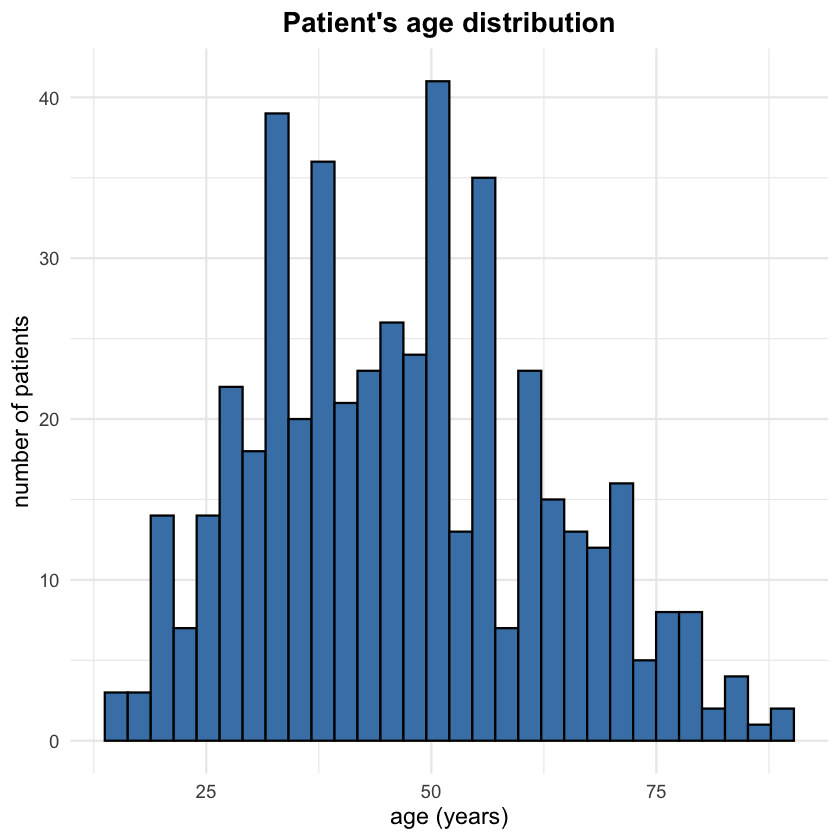

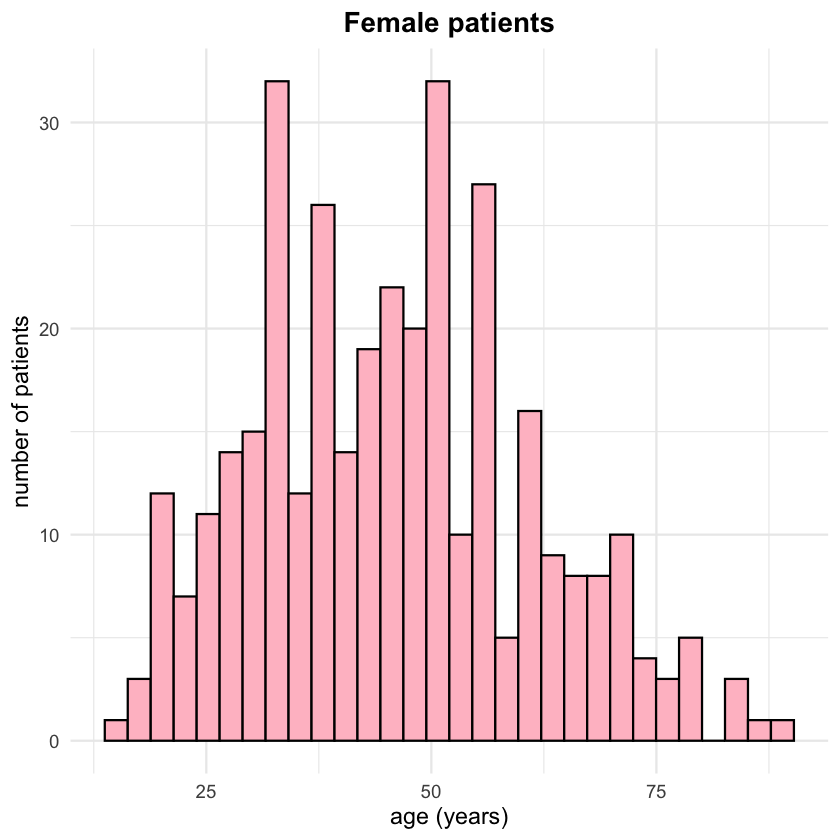

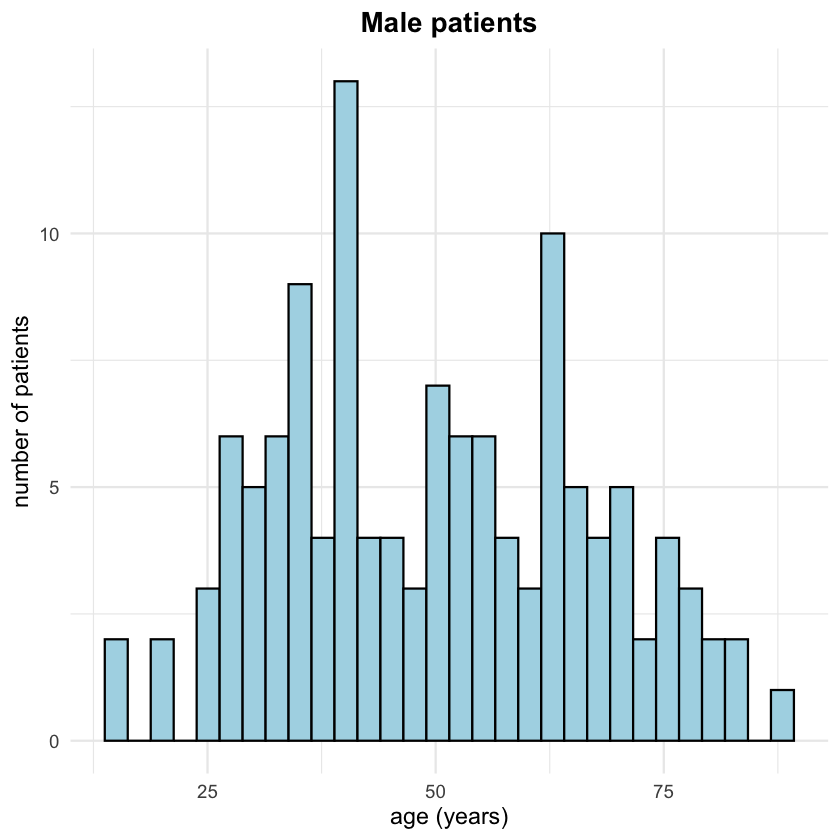

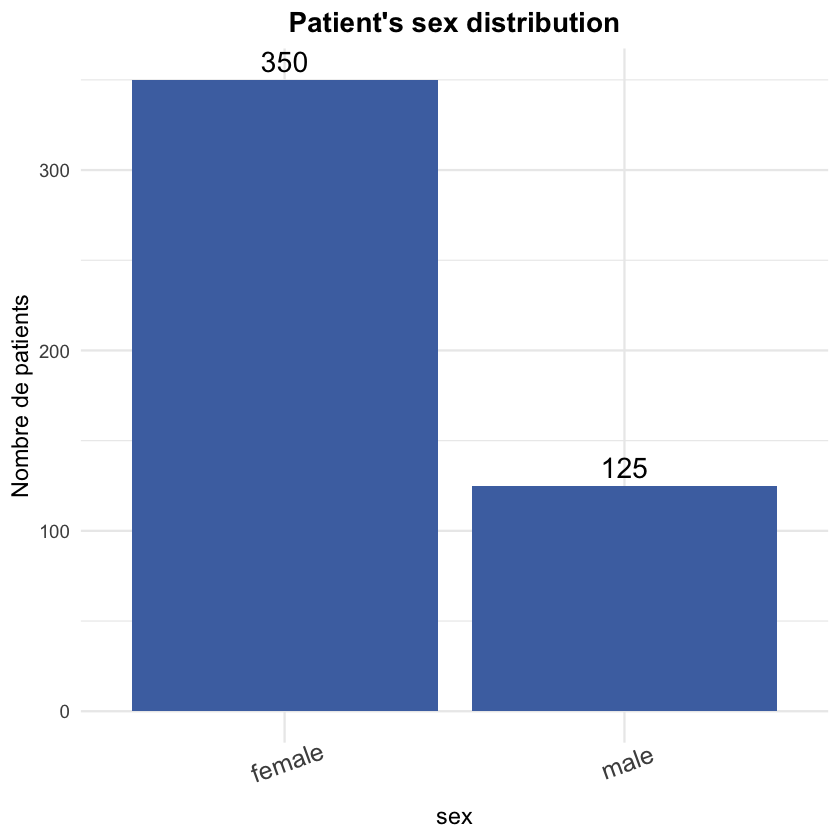

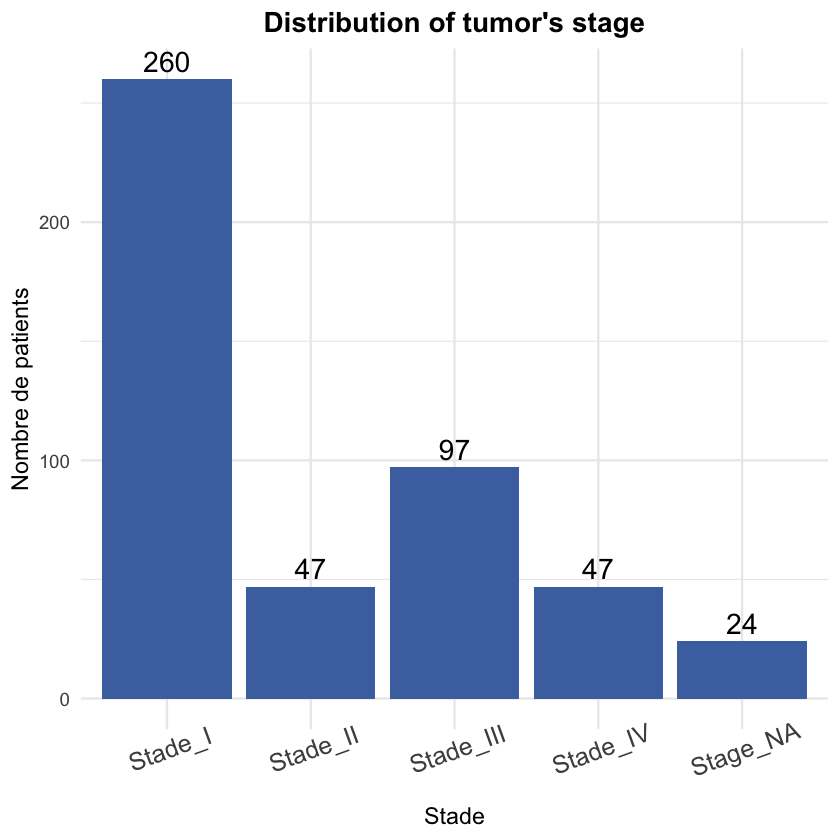

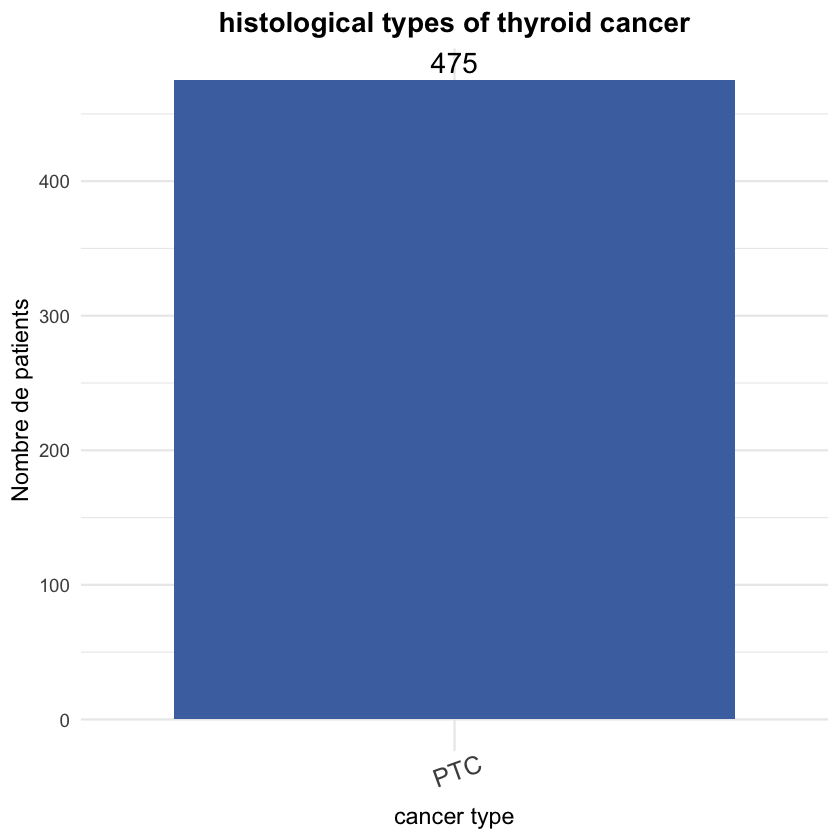

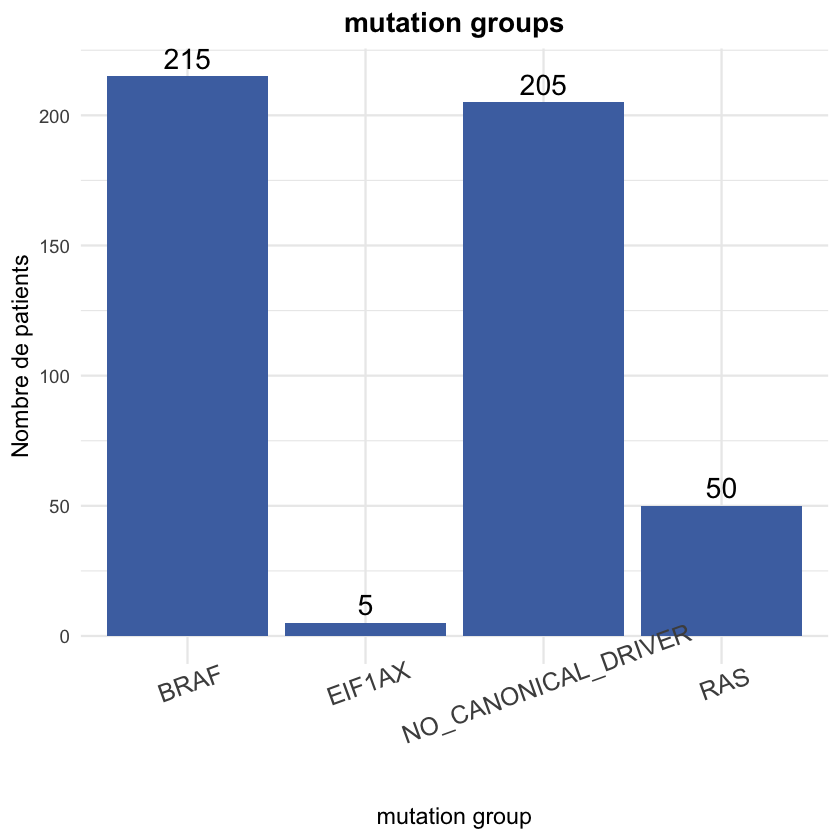

In [55]:
# plot pour les ages
ggplot(metadata_patients, aes(x = age_years)) +
  geom_histogram(bins = 30, color = "black", fill = "steelblue") + labs(title = "Patient's age distribution", x = "age (years)", y = "number of patients") + theme_minimal(base_size = 14) + theme(plot.title = element_text(face = "bold", hjust = 0.5))

# Plot pour les femmes uniquement
ggplot(metadata_patients %>% filter(sex_short == "female"), aes(x = age_years)) +
  geom_histogram(bins = 30, color = "black", fill = "pink") + 
  labs(title = "Female patients", x = "age (years)", y = "number of patients") + 
  theme_minimal(base_size = 14) + 
  theme(plot.title = element_text(face = "bold", hjust = 0.5))

# Plot pour les hommes uniquement
ggplot(metadata_patients %>% filter(sex_short == "male"), aes(x = age_years)) +
  geom_histogram(bins = 30, color = "black", fill = "lightblue") + 
  labs(title = "Male patients", x = "age (years)", y = "number of patients") + 
  theme_minimal(base_size = 14) + 
  theme(plot.title = element_text(face = "bold", hjust = 0.5))

# plot pour les sexes
plot_bar_counts(metadata_patients, var   = "sex_short", title = "Patient's sex distribution", xlab  = "sex")

# plot pour les stades tumoraux
plot_bar_counts(metadata_patients, var   = "stage_simple", title = "Distribution of tumor's stage", xlab  = "Stade")

# plot pour les types tumoraux
plot_bar_counts(metadata_patients, var   = "cancer_type", title = "histological types of thyroid cancer", xlab  = "cancer type")

# plot pour les groupes de mutations
plot_bar_counts(metadata_patients, var   = "mutation_group", title = "mutation groups", xlab  = "mutation group")


	Kruskal-Wallis rank sum test

data:  age_years by stage_simple
Kruskal-Wallis chi-squared = 202.51, df = 4, p-value < 2.2e-16


Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”


,Stade_I,Stade_II,Stade_III,Stade_IV
Stade_II,1.307551e-15,NA,NA,NA
Stade_III,2.153660e-29,0.699524256,NA,NA
Stade_IV,2.598137e-18,0.572366045,0.298993008,NA
Stage_NA,2.050849e-02,0.005628471,0.002395092,0.002052815


stage_1,stage_2,p_value
<chr>,<chr>,<dbl>
Stade_II,Stade_I,1.307551e-15
Stade_III,Stade_I,2.153660e-29
Stade_III,Stade_II,6.995243e-01
Stade_IV,Stade_I,2.598137e-18
Stade_IV,Stade_II,5.723660e-01
Stade_IV,Stade_III,2.989930e-01
Stage_NA,Stade_I,2.050849e-02
Stage_NA,Stade_II,5.628471e-03
Stage_NA,Stade_III,2.395092e-03


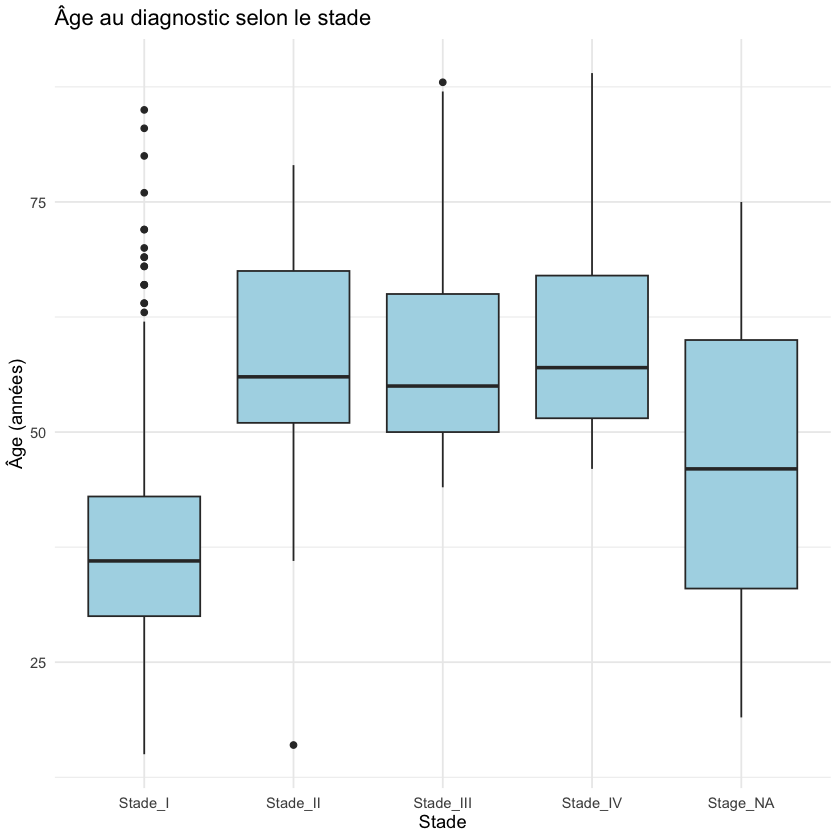

In [56]:
ggplot(metadata_patients, aes(x = stage_simple, y = age_years)) + geom_boxplot(fill = "lightblue") + labs( title = "Âge au diagnostic selon le stade", x = "Stade", y = "Âge (années)") + theme_minimal()  

# Test de Kruskal-Wallis pour l'âge en fonction du stade
df_age_stage <- metadata_patients %>%
  filter(!is.na(stage_simple)) %>%
  select(stage_simple, age_years)

kruskal.test(age_years ~ stage_simple, data = df_age_stage)

pairwise_results <- pairwise.wilcox.test(
  df_age_stage$age_years,
  df_age_stage$stage_simple,
  p.adjust.method = "BH"   # Benjamini–Hochberg
)
# résultats des tests statistiques
pairwise_results$p.value
pval_table <- as.data.frame(pairwise_results$p.value)
library(tidyr)

pval_long <- pval_table %>%
  mutate(stage_1 = rownames(.)) %>%
  pivot_longer(
    cols = -stage_1,
    names_to = "stage_2",
    values_to = "p_value"
  ) %>%
  filter(!is.na(p_value))

pval_long

### _**Mettre les labels dans le nom des patients**_

In [57]:
metadata_patients <- metadata_patients %>%
  mutate(
    sample_label = paste(
      paste0("ID=", patient_id),
      paste0("AGE=", age_years, "ANS"),
      paste0("SEX=", sex_short),
      paste0("STAGE=", stage_simple),
      paste0("MUT=", mutation_group),
      paste0("TYPE=", cancer_type),
      sep = "_"
    )
  )

metadata_patients$sample_label <- make.unique(metadata_patients$sample_label)

vérifier que les noms des patients dans la matrice d'expression et dans la metadata sont bien dans le meme ordre ! si c'est FALSE, y'a une erreur !

In [58]:
# extraire les patient_id depuis les colnames
id_from_se <- sub("^ID=([^_]+).*", "\\1", colnames(se_patient))

# comparer à metadata
all(id_from_se == metadata_patients$patient_id)

[1] FALSE

In [59]:
sample_label <- paste(
  paste0("ID=", metadata_patients$patient_id),
  paste0("AGE=", metadata_patients$age_years, "ANS"),
  paste0("SEX=", metadata_patients$sex_short),
  paste0("STAGE=", metadata_patients$stage_simple),
  paste0("MUT=", metadata_patients$mutation_group),
  paste0("TYPE=", metadata_patients$cancer_type),
  sep = "_"
)

sample_label <- make.unique(sample_label)
colnames(se_patient) <- sample_label

In [60]:
head(colnames(se_patient))
length(colnames(se_patient)) # nombre de patients pour lesquels on a des données d'expression

[1] "ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC"                
[2] "ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC" 
[3] "ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC"              
[4] "ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC"
[5] "ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC"                
[6] "ID=TCGA-EL-A3T7_AGE=47ANS_SEX=female_STAGE=Stade_II_MUT=BRAF_TYPE=PTC"

[1] 475

## *Matrice d'expresison finale*

In [61]:
expr_final <- assay(se_patient, "unstranded")

In [62]:
head(expr_final[, 1:5])

,ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC
ENSG00000000003.15,6156,7191,2219,5185,4466
ENSG00000000005.6,7,3,1,0,3
ENSG00000000419.13,2540,3815,735,2594,1496
ENSG00000000457.14,1452,767,305,970,820
ENSG00000000460.17,297,276,28,135,208
ENSG00000000938.13,1075,1069,303,71,610


### _**Enregistrer la matrice finale en CSV**_

In [67]:
# Enregistrer la matrice finale en CSV

write.csv(
 expr_final,
 file = "../data/THCA_expression_matrix_final.csv",
 row.names = TRUE
)

In [68]:
y_df <- metadata_patients %>%
  select(
    patient_id,
    sample_label,
    stage_simple,
    age_years,
    sex_short,
    cancer_type,
    mutation_group
  )

write.csv(
  y_df,
  file = "../data/y_TCGA_THCA.csv",
  row.names = FALSE
)

### _**UMAP, PCA**_

In [63]:
# normalisation 
expr_log <- log2(expr_final + 1)

# filtrer gènes peu importants
gene_var <- apply(expr_log, 1, var) # variance par gène
top_genes <- names(sort(gene_var, decreasing = TRUE))[1:5000] # garder les 5 000 gènes les plus variables
expr_filt <- expr_log[top_genes, ]


Importance of components:
                           PC1     PC2      PC3      PC4      PC5      PC6
Standard deviation     30.8125 21.5410 19.27043 14.02355 12.31611 10.62137
Proportion of Variance  0.1899  0.0928  0.07427  0.03933  0.03034  0.02256
Cumulative Proportion   0.1899  0.2827  0.35695  0.39629  0.42662  0.44919
                            PC7     PC8    PC9   PC10    PC11    PC12    PC13
Standard deviation     10.33500 8.87110 8.3062 8.2166 7.42367 7.11614 6.76171
Proportion of Variance  0.02136 0.01574 0.0138 0.0135 0.01102 0.01013 0.00914
Cumulative Proportion   0.47055 0.48629 0.5001 0.5136 0.52461 0.53474 0.54388
                          PC14    PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     6.35532 6.18802 6.03634 5.87999 5.66929 5.44973 5.27093
Proportion of Variance 0.00808 0.00766 0.00729 0.00691 0.00643 0.00594 0.00556
Cumulative Proportion  0.55196 0.55962 0.56691 0.57382 0.58025 0.58619 0.59175
                         PC21    PC22    PC23 

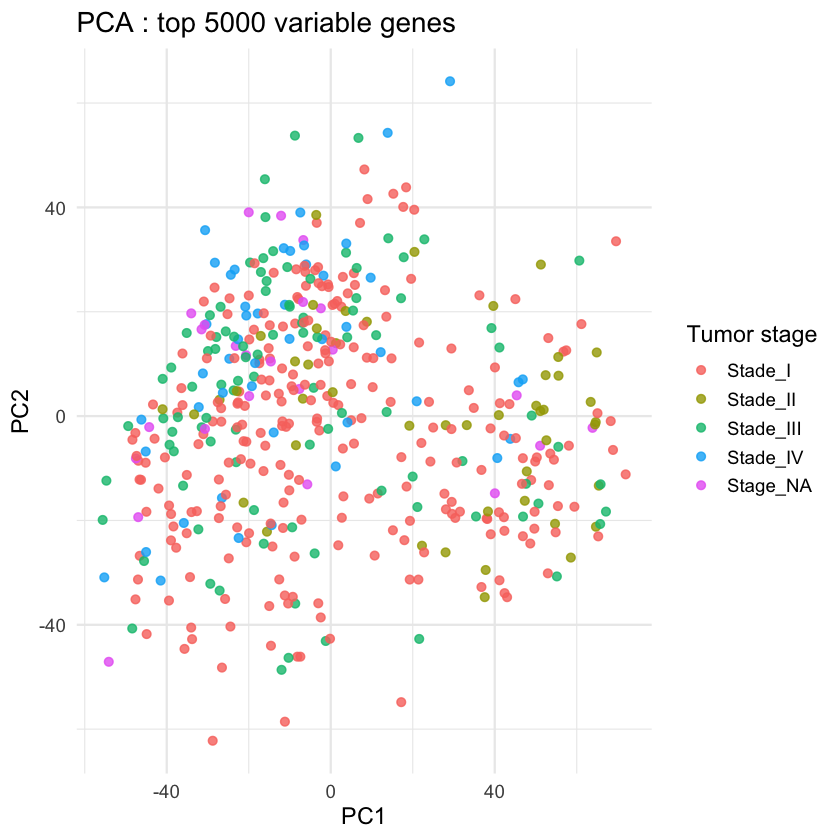

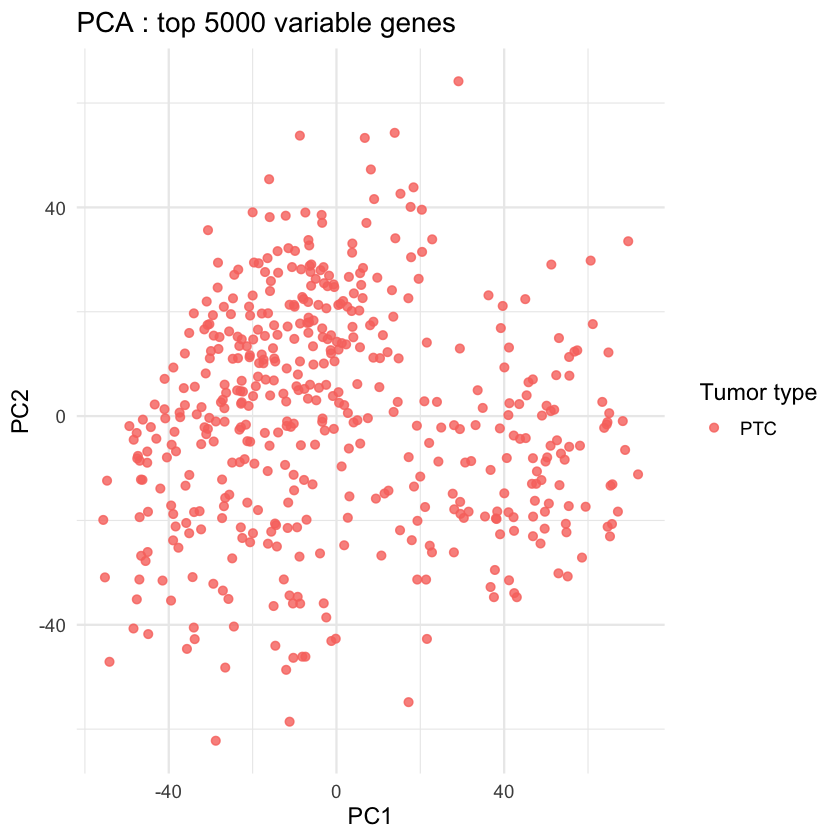

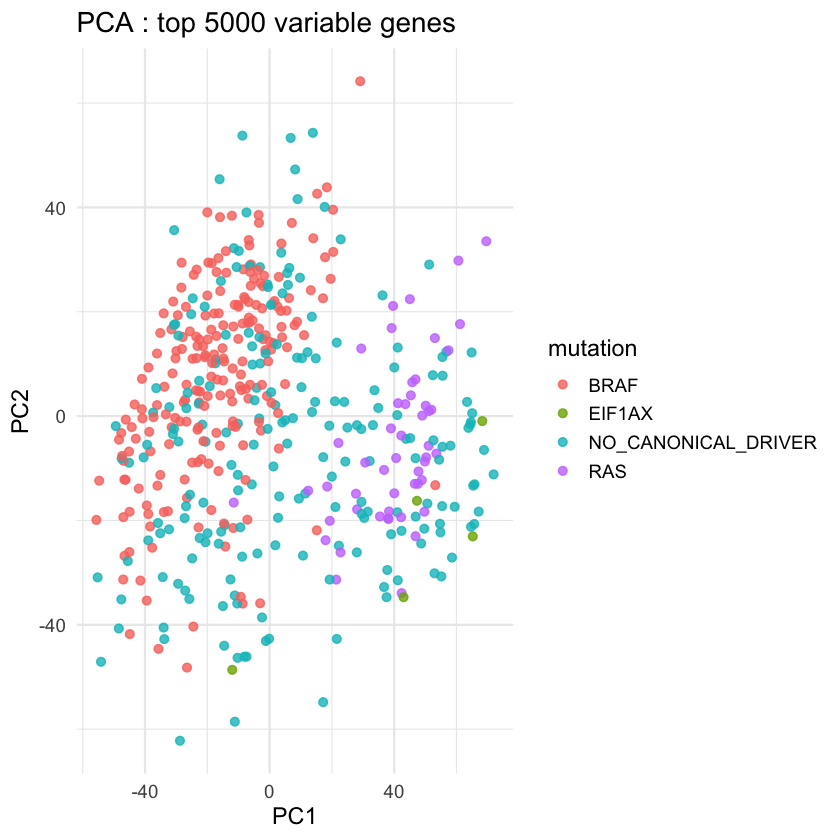

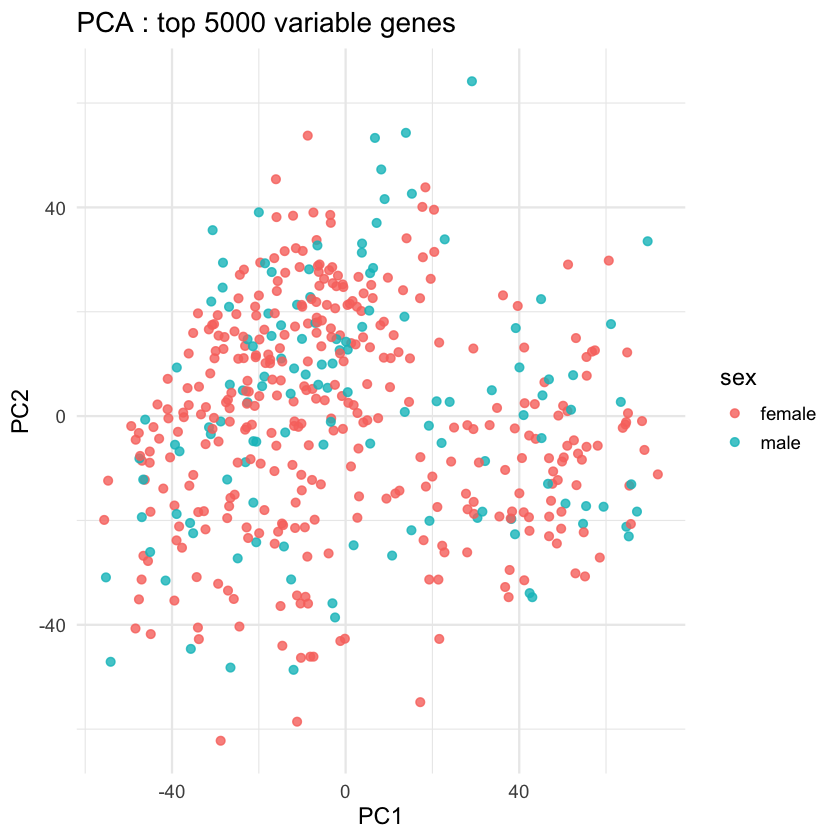

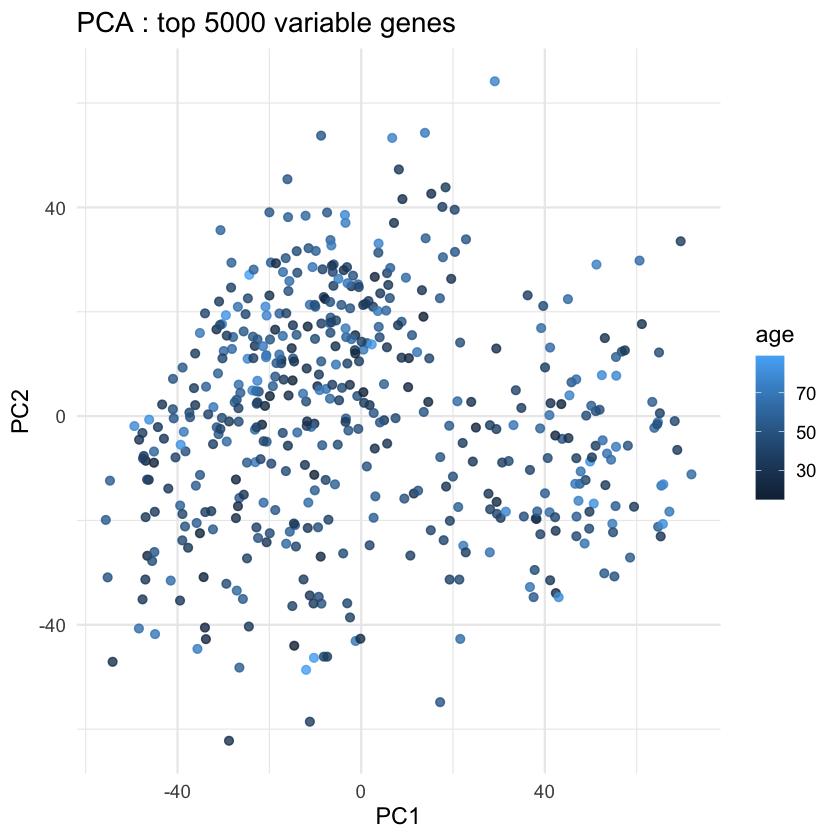

In [64]:
# PCA
pca <- prcomp(t(expr_filt), center = TRUE, scale. = TRUE)
summary(pca)

pca_df <- data.frame(
  PC1 = pca$x[,1],
  PC2 = pca$x[,2],
  stage = metadata_patients$stage_simple,
  type = metadata_patients$cancer_type,
  mutation = metadata_patients$mutation_group,
  sex = metadata_patients$sex_short,
  age = metadata_patients$age_years
)

ggplot(pca_df, aes(PC1, PC2, color = stage)) + geom_point(size = 2, alpha = 0.8) + theme_minimal(base_size = 14) + labs(title = "PCA : top 5000 variable genes", 
      color = "Tumor stage")

ggplot(pca_df, aes(PC1, PC2, color = type)) + geom_point(size = 2, alpha = 0.8) + theme_minimal(base_size = 14) + labs(title = "PCA : top 5000 variable genes", 
      color = "Tumor type")

ggplot(pca_df, aes(PC1, PC2, color = mutation)) + geom_point(size = 2, alpha = 0.8) + theme_minimal(base_size = 14) + labs(title = "PCA : top 5000 variable genes", 
      color = "mutation")

ggplot(pca_df, aes(PC1, PC2, color = sex)) + geom_point(size = 2, alpha = 0.8) + theme_minimal(base_size = 14) + labs(title = "PCA : top 5000 variable genes", 
      color = "sex")

ggplot(pca_df, aes(PC1, PC2, color = age)) + geom_point(size = 2, alpha = 0.8) + theme_minimal(base_size = 14) + labs(title = "PCA : top 5000 variable genes", 
      color = "age")
      

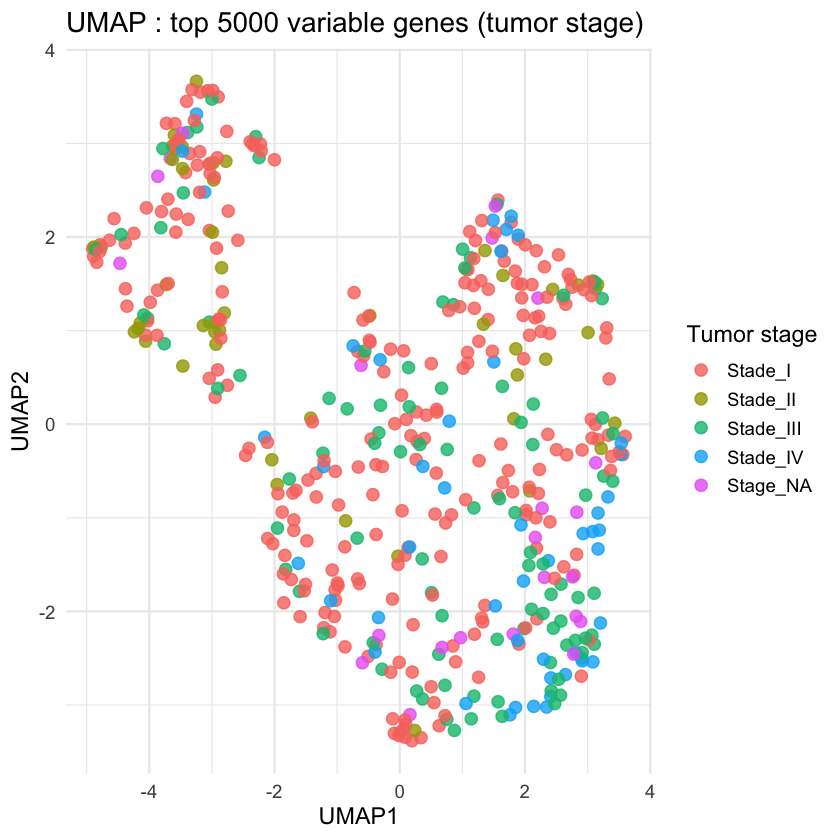

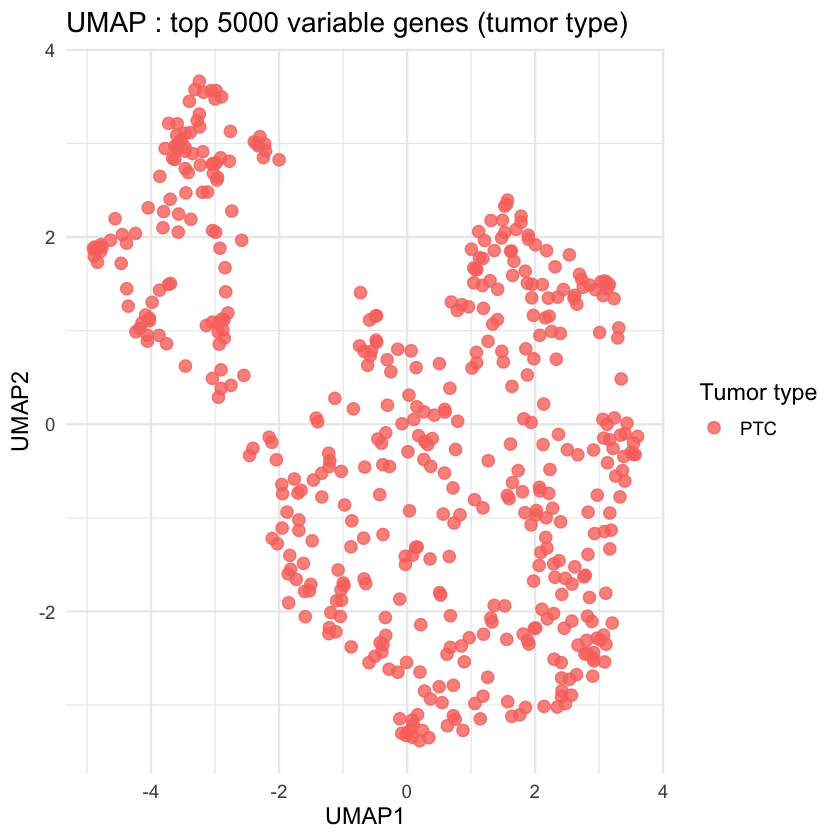

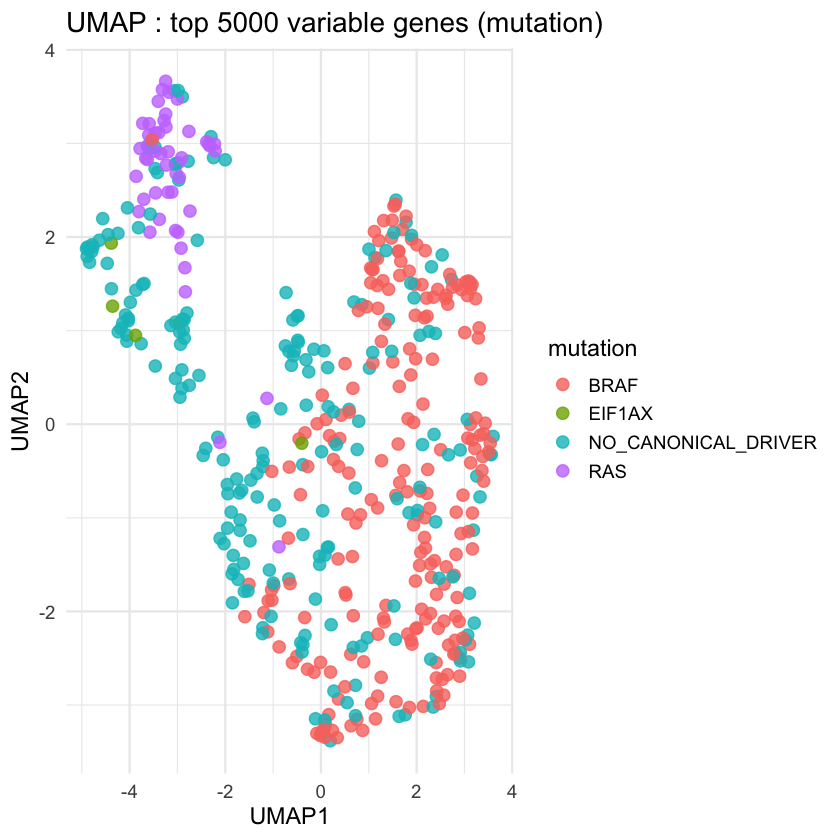

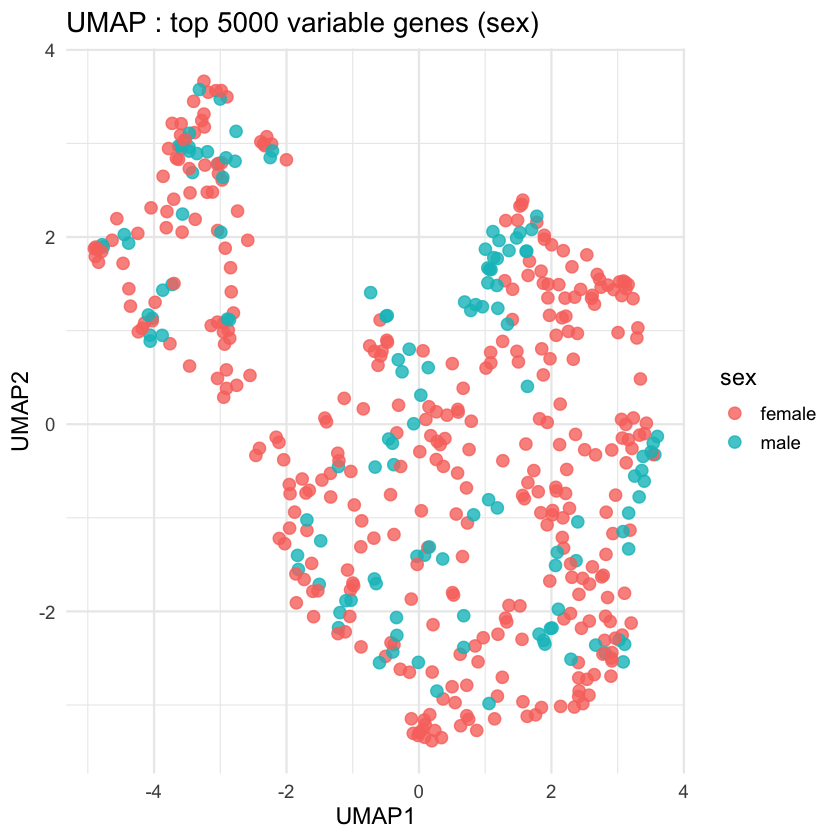

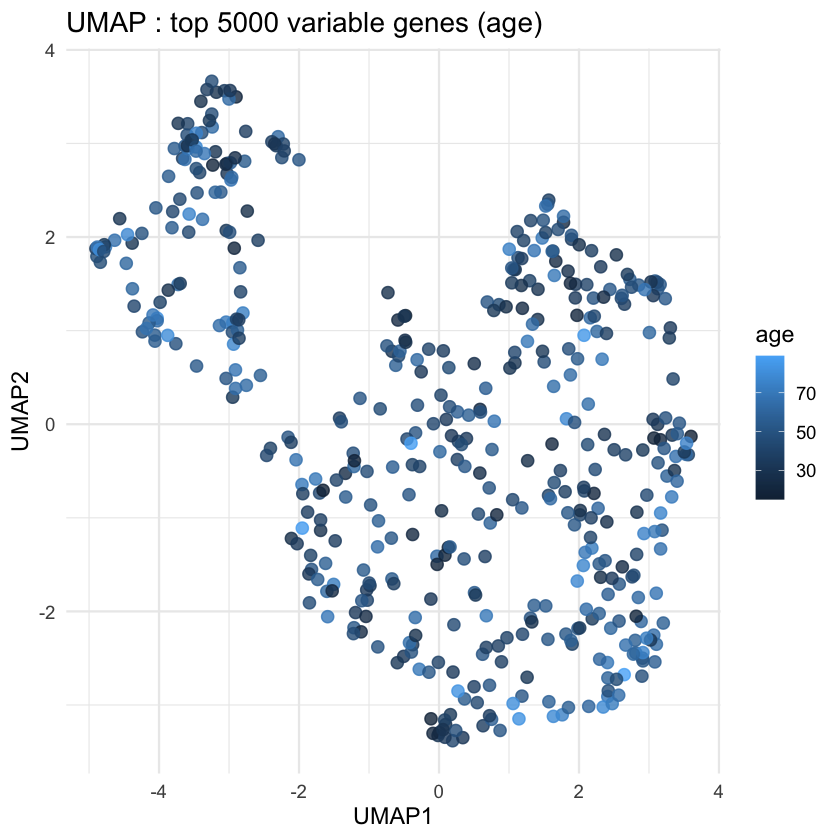

In [65]:
#install.packages("uwot")
library(uwot)

set.seed(42)
umap_res <- umap(
  t(expr_filt),
  n_neighbors = 13,
  min_dist = 0.15,
  metric = "cosine"
)

umap_df <- data.frame(
  UMAP1 = umap_res[,1],
  UMAP2 = umap_res[,2],
  stage = metadata_patients$stage_simple,
  type = metadata_patients$cancer_type,
  mutation = metadata_patients$mutation_group, 
  sex = metadata_patients$sex_short,
  age = metadata_patients$age_years)

ggplot(umap_df, aes(UMAP1, UMAP2, color = stage)) + geom_point(size = 3, alpha = 0.8) + theme_minimal(base_size = 14) + labs( title = "UMAP : top 5000 variable genes (tumor stage)", color = "Tumor stage")
ggplot(umap_df, aes(UMAP1, UMAP2, color = type)) + geom_point(size = 3, alpha = 0.8) + theme_minimal(base_size = 14) + labs( title = "UMAP : top 5000 variable genes (tumor type)", color = "Tumor type")
ggplot(umap_df, aes(UMAP1, UMAP2, color = mutation)) + geom_point(size = 3, alpha = 0.8) + theme_minimal(base_size = 14) + labs( title = "UMAP : top 5000 variable genes (mutation)", color = "mutation")
ggplot(umap_df, aes(UMAP1, UMAP2, color = sex)) + geom_point(size = 3, alpha = 0.8) + theme_minimal(base_size = 14) + labs( title = "UMAP : top 5000 variable genes (sex)", color = "sex")
ggplot(umap_df, aes(UMAP1, UMAP2, color = age)) + geom_point(size = 3, alpha = 0.8) + theme_minimal(base_size = 14) + labs( title = "UMAP : top 5000 variable genes (age)", color = "age")

# **Matrice de congruence (tableaux croisés)**

- Entre les stades tumoraux/types de mutation et le sexe
- Entre les stades tumoraux/types de mutation et la tranche d'âge
- Entre les stades tumoraux et les types de mutations

## *Création des tableaux croisés*

In [90]:
# Installation du package gridExtra si nécessaire
if (!require("gridExtra")) install.packages("gridExtra")
library(gridExtra)
library(grid)

# Créer une tranche d'âge pour les analyses
metadata_patients <- metadata_patients %>%
  mutate(
    age_group = case_when(
      age_years < 40 ~ "<40 ans",
      age_years >= 40 & age_years < 55 ~ "40-54 ans",
      age_years >= 55 & age_years < 70 ~ "55-69 ans",
      age_years >= 70 ~ ">=70 ans",
      TRUE ~ NA_character_
    ),
    age_group = factor(age_group, levels = c("<40 ans", "40-54 ans", "55-69 ans", ">=70 ans"), ordered = TRUE)
  )

create_table_grob <- function(table_data, title) {

  library(ggplot2)
  library(grid)
  library(gridExtra)

  # 1) Ajouter totaux (peu importe comment ils sont nommés)
  tab <- addmargins(table_data, margin = c(1, 2), FUN = sum, quiet = TRUE)

  # 2) Format long
  df <- as.data.frame(tab)
  colnames(df) <- c("Row", "Col", "Value")

  # 3) Détecter la ligne/colonne "Total" de manière robuste :
  #    -> on prend la DERNIÈRE modalité de Row et de Col (c’est toujours le total ajouté)
  df$Row <- factor(df$Row, levels = unique(df$Row))
  df$Col <- factor(df$Col, levels = unique(df$Col))

  total_row_level <- tail(levels(df$Row), 1)
  total_col_level <- tail(levels(df$Col), 1)

  df$is_total <- (df$Row == total_row_level) | (df$Col == total_col_level)

  # 4) Valeur de remplissage : NA pour les totaux => exclus du gradient
  df$FillValue <- ifelse(df$is_total, NA, df$Value)

  # 5) Échelle de couleur basée uniquement sur les vraies cellules
  fill_limits <- range(df$FillValue, na.rm = TRUE)

  p <- ggplot(df, aes(x = Col, y = Row)) +
    geom_tile(aes(fill = FillValue), color = "grey30", linewidth = 0.6) +
    geom_text(aes(label = Value), size = 6, fontface = "bold") +
    scale_fill_gradient(
      low = "white",
      high = "salmon",
      limits = fill_limits,
      na.value = "white",
      name = "Effectif"
    ) +
    scale_y_discrete(limits = rev(levels(df$Row))) +
    coord_fixed() +
    labs(title = title, x = NULL, y = NULL) +
    theme_minimal(base_size = 16) +
    theme(
      plot.title = element_text(face = "bold", hjust = 0.5, size = 18),
      axis.text.x = element_text(face = "bold", size = 14),
      axis.text.y = element_text(face = "bold", size = 14),
      panel.grid = element_blank(),
      legend.position = "right"
    )

  ggplotGrob(p)
}


# 1. Stade tumoral × Sexe
table1 <- table(metadata_patients$stage_simple, metadata_patients$sex_short)
grob1 <- create_table_grob(table1, "Tableau 1 : Stade tumoral × Sexe")

# 2. Type de mutation × Sexe
table2 <- table(metadata_patients$mutation_group, metadata_patients$sex_short)
grob2 <- create_table_grob(table2, "Tableau 2 : Type de mutation × Sexe")

# 3. Stade tumoral × Tranche d'âge
table3 <- table(metadata_patients$stage_simple, metadata_patients$age_group)
grob3 <- create_table_grob(table3, "Tableau 3 : Stade tumoral × Tranche d'âge")

# 4. Type de mutation × Tranche d'âge
table4 <- table(metadata_patients$mutation_group, metadata_patients$age_group)
grob4 <- create_table_grob(table4, "Tableau 4 : Type de mutation × Tranche d'âge")

# 5. Stade tumoral × Type de mutation
table5 <- table(metadata_patients$stage_simple, metadata_patients$mutation_group)
grob5 <- create_table_grob(table5, "Tableau 5 : Stade tumoral × Type de mutation")

# 6. Stade tumoral x Type de mutation (early vs late)
metadata_patients <- metadata_patients %>%
  mutate(
    stage_EL = case_when(
      stage_simple %in% c("Stade_I", "Stade_II") ~ "Early",
      stage_simple %in% c("Stade_III", "Stade_IV") ~ "Late",
      TRUE ~ NA_character_
    ),
    stage_EL = factor(stage_EL, levels = c("Early", "Late"))
  )

df6 <- metadata_patients %>%
  filter(!is.na(stage_EL), !is.na(mutation_group))

table6 <- table(df6$stage_EL, df6$mutation_group)
grob6 <- create_table_grob(table6, "Tableau 6 : Stade Early/Late × Type de mutation")

# Sauvegarder tous les tableaux dans un seul PDF
pdf("../results/tableaux_congruence.pdf", width = 11, height = 8.5)

grid.newpage()
grid.draw(grob1)

grid.newpage()
grid.draw(grob2)

grid.newpage()
grid.draw(grob3)

grid.newpage()
grid.draw(grob4)

grid.newpage()
grid.draw(grob5)

grid.newpage()
grid.draw(grob6)

dev.off()

# Afficher également les tableaux dans le notebook pour vérification
print("Tableau 1 : Stade tumoral × Sexe")
print(addmargins(table1))

print("Tableau 2 : Type de mutation × Sexe")
print(addmargins(table2))

print("Tableau 3 : Stade tumoral × Tranche d'âge")
print(addmargins(table3))

print("Tableau 4 : Type de mutation × Tranche d'âge")
print(addmargins(table4))

print("Tableau 5 : Stade tumoral × Type de mutation")
print(addmargins(table5))

cat("\n✓ Tous les tableaux ont été sauvegardés dans : ../results/tableaux_congruence.pdf\n")

agg_record_2136138755 
                    2

[1] "Tableau 1 : Stade tumoral × Sexe"
           
            female male Sum
  Stade_I      199   61 260
  Stade_II      36   11  47
  Stade_III     71   26  97
  Stade_IV      26   21  47
  Stage_NA      18    6  24
  Sum          350  125 475
[1] "Tableau 2 : Type de mutation × Sexe"
                     
                      female male Sum
  BRAF                   159   56 215
  EIF1AX                   2    3   5
  NO_CANONICAL_DRIVER    151   54 205
  RAS                     38   12  50
  Sum                    350  125 475
[1] "Tableau 3 : Stade tumoral × Tranche d'âge"
           
            <40 ans 40-54 ans 55-69 ans >=70 ans Sum
  Stade_I       165        64        24        7 260
  Stade_II        2        17        19        9  47
  Stade_III       0        45        34       18  97
  Stade_IV        0        16        21       10  47
  Stage_NA        9         6         7        2  24
  Sum           176       148       105       46 475
[1] "Tableau 4 : Type de mutat

## *Statistiques*

In [100]:
analyze_table <- function(tab, name) {

  cat("\n=============================\n")
  cat(name, "\n")
  cat("=============================\n\n")

  print(addmargins(tab))

  chi <- chisq.test(tab, correct = FALSE)
  print(chi)

  cat("\nProportion expected <5 :", mean(chi$expected < 5), "\n")

  if (mean(chi$expected < 5) > 0.2) {
    cat("\n⚠️ Chi2 assumptions violated → Monte Carlo simulation\n")
    chi_mc <- chisq.test(tab, simulate.p.value = TRUE, B = 10000)
    print(chi_mc)
    pval <- chi_mc$p.value
  } else {
    pval <- chi$p.value
  }

  v <- cramerV(tab, bias.correct = TRUE)
  cat("\nCramér's V :", round(v, 3), "\n")

  invisible(list(p.value = pval, cramersV = v))
}

In [101]:

res1 <- analyze_table(table1, "Tableau 1 : Stade × Sexe")


Tableau 1 : Stade × Sexe 

           
            female male Sum
  Stade_I      199   61 260
  Stade_II      36   11  47
  Stade_III     71   26  97
  Stade_IV      26   21  47
  Stage_NA      18    6  24
  Sum          350  125 475

	Pearson's Chi-squared test

data:  tab
X-squared = 9.5063, df = 4, p-value = 0.04962


Proportion expected <5 : 0 

Cramér's V : 0.108 


In [102]:
res2 <- analyze_table(table2, "Tableau 2 : Mutation × Sexe")


Tableau 2 : Mutation × Sexe 

                     
                      female male Sum
  BRAF                   159   56 215
  EIF1AX                   2    3   5
  NO_CANONICAL_DRIVER    151   54 205
  RAS                     38   12  50
  Sum                    350  125 475


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 3.0721, df = 3, p-value = 0.3806


Proportion expected <5 : 0.25 

⚠️ Chi2 assumptions violated → Monte Carlo simulation

	Pearson's Chi-squared test with simulated p-value (based on 10000
	replicates)

data:  tab
X-squared = 3.0721, df = NA, p-value = 0.3928


Cramér's V : 0.012 


In [103]:
res3 <- analyze_table(table3, "Tableau 3 : Stade × Âge")


Tableau 3 : Stade × Âge 

           
            <40 ans 40-54 ans 55-69 ans >=70 ans Sum
  Stade_I       165        64        24        7 260
  Stade_II        2        17        19        9  47
  Stade_III       0        45        34       18  97
  Stade_IV        0        16        21       10  47
  Stage_NA        9         6         7        2  24
  Sum           176       148       105       46 475


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 204.82, df = 12, p-value < 2.2e-16


Proportion expected <5 : 0.15 

Cramér's V : 0.369 


In [104]:
res4 <- analyze_table(table4, "Tableau 4 : Mutation × Âge")


Tableau 4 : Mutation × Âge 

                     
                      <40 ans 40-54 ans 55-69 ans >=70 ans Sum
  BRAF                     79        72        43       21 215
  EIF1AX                    1         1         0        3   5
  NO_CANONICAL_DRIVER      75        61        49       20 205
  RAS                      21        14        13        2  50
  Sum                     176       148       105       46 475


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 18.525, df = 9, p-value = 0.02955


Proportion expected <5 : 0.3125 

⚠️ Chi2 assumptions violated → Monte Carlo simulation

	Pearson's Chi-squared test with simulated p-value (based on 10000
	replicates)

data:  tab
X-squared = 18.525, df = NA, p-value = 0.0271


Cramér's V : 0.082 


In [105]:
res5 <- analyze_table(table5, "Tableau 5 : Stade × Mutation")


Tableau 5 : Stade × Mutation 

           
            BRAF EIF1AX NO_CANONICAL_DRIVER RAS Sum
  Stade_I    113      3                 112  32 260
  Stade_II    15      1                  25   6  47
  Stade_III   49      1                  41   6  97
  Stade_IV    23      0                  21   3  47
  Stage_NA    15      0                   6   3  24
  Sum        215      5                 205  50 475


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 12.205, df = 12, p-value = 0.4294


Proportion expected <5 : 0.4 

⚠️ Chi2 assumptions violated → Monte Carlo simulation

	Pearson's Chi-squared test with simulated p-value (based on 10000
	replicates)

data:  tab
X-squared = 12.205, df = NA, p-value = 0.4061


Cramér's V : 0.011 


In [109]:
res6 <- analyze_table(table6, "Tableau 6 : Stade × Mutation")


Tableau 6 : Stade × Mutation 

       
        BRAF EIF1AX NO_CANONICAL_DRIVER RAS Sum
  Early  128      4                 137  38 307
  Late    72      1                  62   9 144
  Sum    200      5                 199  47 451


Warning message in chisq.test(tab, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 5.4391, df = 3, p-value = 0.1423


Proportion expected <5 : 0.25 

⚠️ Chi2 assumptions violated → Monte Carlo simulation

	Pearson's Chi-squared test with simulated p-value (based on 10000
	replicates)

data:  tab
X-squared = 5.4391, df = NA, p-value = 0.1495


Cramér's V : 0.074 


In [110]:

pvals <- c(
  res1$chi2$p.value,
  res2$chi2$p.value,
  res3$chi2$p.value,
  res4$chi2$p.value,
  res5$chi2$p.value,
  res6$chi2$p.value

)

p.adjust(pvals, method = "bonferroni")

numeric(0)

### plots

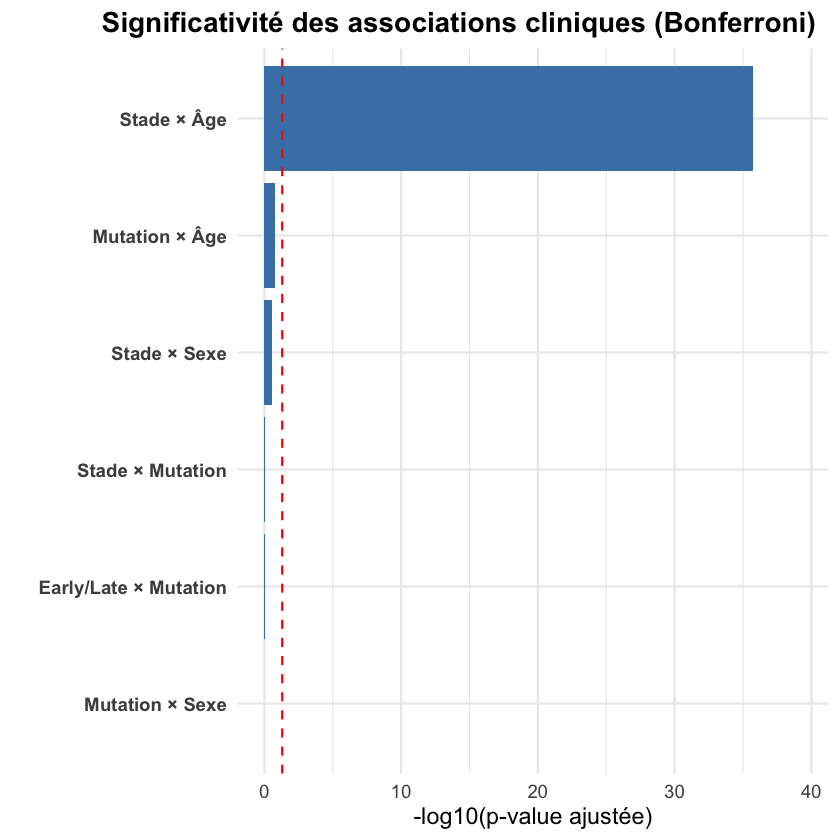

In [144]:
pvals_raw <- c(
  res1$p.value,
  res2$p.value,
  res3$p.value,
  res4$p.value,
  res5$p.value,
  res6$p.value
)
pvals_adj <- p.adjust(pvals_raw, method = "bonferroni")

cramers <- c(
  res1$cramersV,
  res2$cramersV,
  res3$cramersV,
  res4$cramersV,
  res5$cramersV,
  res6$cramersV
)

test_names <- c(
  "Stade × Sexe",
  "Mutation × Sexe",
  "Stade × Âge",
  "Mutation × Âge",
  "Stade × Mutation",
  "Early/Late × Mutation"
)

df_stats <- data.frame(
  Test = test_names,
  p_adj = pvals_adj,
  neglog10p = -log10(pvals_adj),
  CramersV = cramers
)

ggplot(df_stats, aes(x = reorder(Test, neglog10p), y = neglog10p)) +
  geom_col(fill = "steelblue") +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed", color = "red") +
  coord_flip() +
  labs(
    title = "Significativité des associations cliniques (Bonferroni)",
    y = "-log10(p-value ajustée)",
    x = "",
  ) +
  theme_minimal(base_size = 14) + theme(
    plot.title = element_text(face = "bold", hjust = 1.1),
    axis.text.y = element_text(face = "bold")
  ) +
  expand_limits(y = max(df_stats$neglog10p) * 1.1)

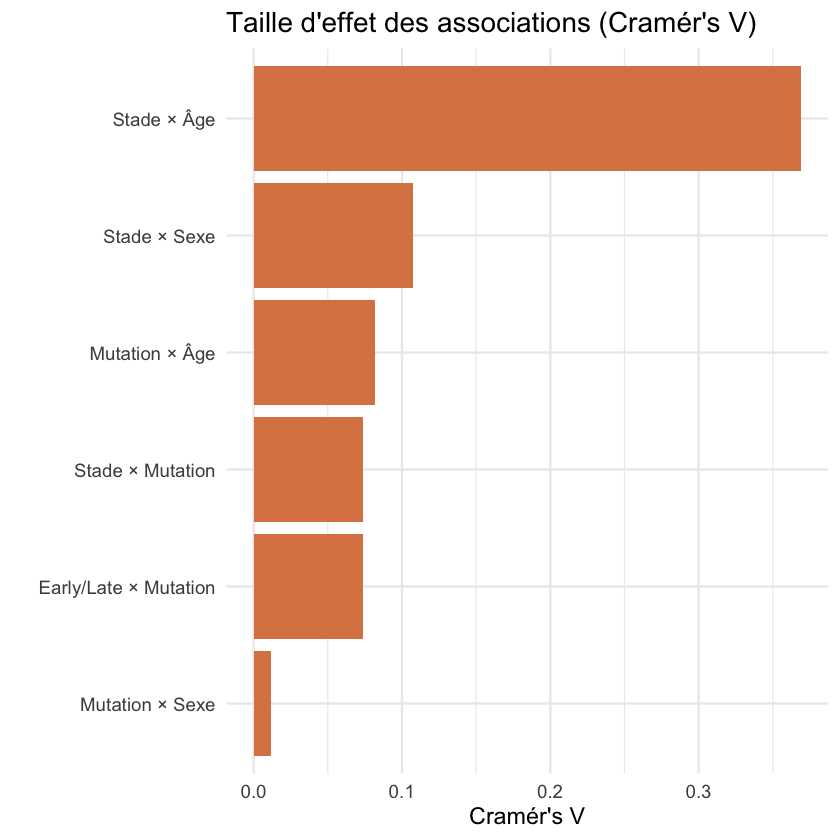

In [ ]:
# taille de l'effet (Cramer's V)
ggplot(df_stats, aes(x = reorder(Test, CramersV), y = CramersV)) +
  geom_col(fill = "#DD8452") ++
  coord_flip() +
  labs(
    title = "Taille d'effet des associations (Cramér's V)",
    y = "Cramér's V",
    x = ""
  ) +
  theme_minimal(base_size = 14)